In [ ]:
import pandas as pd
df = pd.read_csv("/content/train (1).csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
age_mean = df.Age.mean()
age_mean

29.69911764705882

In [ ]:
df = df.drop(['PassengerId','Name','Fare','Ticket','Cabin'],axis=1)

In [ ]:
mod_embarked = df.Embarked.mode()
mod_embarked

0    S
Name: Embarked, dtype: object

In [ ]:
df['Age'] = df['Age'].fillna(age_mean)

In [ ]:
mod_embarked[0]

'S'

In [ ]:
df['Embarked'] = df['Embarked'].fillna(mod_embarked[0])

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [ ]:
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [ ]:
x = df[['Pclass','Sex','Age','SibSp','Parch','Embarked']]
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
model.score(x_test,y_test)

0.7486033519553073

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0])

In [ ]:
pd.DataFrame({"Actual": y_test, "Predictions": y_pred})

,Actual,Predictions
426,1,1
54,0,0
690,1,0
575,0,0
290,1,1
...,...,...
724,1,0
296,0,0
113,0,1
115,0,0


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
cn = confusion_matrix(y_test, y_pred)

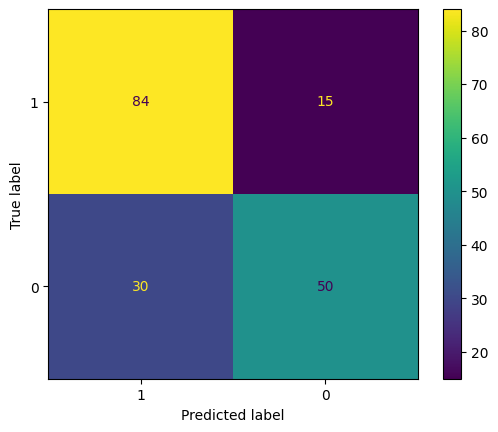

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cn, display_labels=y_test.unique())
disp.plot()